<a href="https://colab.research.google.com/github/msbeeman/Causal/blob/main/transportation_survey.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:

!pip install pgmpy

In [ ]:
import pandas as pd
from pgmpy.models import BayesianModel
from pgmpy.estimators import BayesianEstimator
from pgmpy.factors.discrete.CPD import TabularCPD
import networkx as nx
import matplotlib.pyplot as plt

In [ ]:
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)
pd.set_option('display.max_colwidth', -1)

In [ ]:
def print_full(cpd):
    backup = TabularCPD._truncate_strtable
    TabularCPD._truncate_strtable = lambda self, x: x
    print(cpd)
    TabularCPD._truncate_strtable = backup

In [ ]:
transportation_survey_link = '/content/sample_data/transportation_survey.csv'
data = pd.read_csv(transportation_survey_link)
data.head()

,A,S,E,O,R,T
0,adult,F,high,emp,small,train
1,young,M,high,emp,big,car
2,adult,M,uni,emp,big,other
3,old,F,uni,emp,big,car
4,young,F,uni,emp,big,car


In [ ]:
model = BayesianModel([
    ('A', 'E'),
    ('S', 'E'),
    ('E', 'O'),
    ('E', 'R'),
    ('O', 'T'),
    ('R', 'T'),
])

/usr/local/lib/python3.9/dist-packages/pgmpy/models/BayesianModel.py:8: FutureWarning: BayesianModel has been renamed to BayesianNetwork. Please use BayesianNetwork class, BayesianModel will be removed in future.
  warnings.warn(


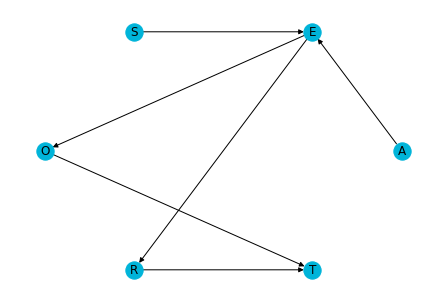

In [ ]:
nx.draw_circular(model, node_color='#00b4d9', with_labels=True)
plt.show()

In [ ]:
estimator = BayesianEstimator(model, data)

In [ ]:
cpd_A = estimator.estimate_cpd(
    'A',
    prior_type='dirichlet', 
    pseudo_counts=[[1], [2], [3]]
)

In [ ]:
print_full(cpd_A)

+----------+----------+
| A(adult) | 0.385375 |
+----------+----------+
| A(old)   | 0.140316 |
+----------+----------+
| A(young) | 0.474308 |
+----------+----------+


In [ ]:
cpd_S = estimator.estimate_cpd(
    'S',
    prior_type='dirichlet', 
    pseudo_counts=[[1], [2]]
)

In [ ]:
print_full(cpd_S)

+------+----------+
| S(F) | 0.520875 |
+------+----------+
| S(M) | 0.479125 |
+------+----------+


In [ ]:
cpd_E = estimator.estimate_cpd(
    'E',
    prior_type='dirichlet', 
    pseudo_counts=[[1, 1, 1, 1, 1, 1], [2, 2, 2, 2, 2, 2]]
)

In [ ]:
print_full(cpd_E)

+---------+---------------------+---------------------+---------------------+---------------------+---------------------+---------------------+
| A       | A(adult)            | A(adult)            | A(old)              | A(old)              | A(young)            | A(young)            |
+---------+---------------------+---------------------+---------------------+---------------------+---------------------+---------------------+
| S       | S(F)                | S(M)                | S(F)                | S(M)                | S(F)                | S(M)                |
+---------+---------------------+---------------------+---------------------+---------------------+---------------------+---------------------+
| E(high) | 0.5137614678899083  | 0.7472527472527473  | 0.8333333333333334  | 0.8484848484848485  | 0.12605042016806722 | 0.7580645161290323  |
+---------+---------------------+---------------------+---------------------+---------------------+---------------------+---------------

In [ ]:
cpd_O = estimator.estimate_cpd(
    'O',
    prior_type='dirichlet', 
    pseudo_counts=[[1, 1], [2, 2]]
)

In [ ]:
print_full(cpd_O)

+---------+----------------------+---------------------+
| E       | E(high)              | E(uni)              |
+---------+----------------------+---------------------+
| O(emp)  | 0.9761092150170648   | 0.9671361502347418  |
+---------+----------------------+---------------------+
| O(self) | 0.023890784982935155 | 0.03286384976525822 |
+---------+----------------------+---------------------+


In [ ]:
cpd_R = estimator.estimate_cpd(
    'R',
    prior_type='dirichlet', 
    pseudo_counts=[[1, 1], [2, 2]]
)

In [ ]:
print_full(cpd_R)

+----------+---------------------+---------------------+
| E        | E(high)             | E(uni)              |
+----------+---------------------+---------------------+
| R(big)   | 0.7542662116040956  | 0.9295774647887324  |
+----------+---------------------+---------------------+
| R(small) | 0.24573378839590443 | 0.07042253521126761 |
+----------+---------------------+---------------------+


In [ ]:
cpd_T = estimator.estimate_cpd(
    'T',
    prior_type='dirichlet', 
    pseudo_counts=[[1, 1, 1, 1], [2, 2, 2, 2], [3, 3, 3, 3]]
)

In [ ]:
print_full(cpd_T)

+----------+---------------------+---------------------+--------------------+---------------------+
| O        | O(emp)              | O(emp)              | O(self)            | O(self)             |
+----------+---------------------+---------------------+--------------------+---------------------+
| R        | R(big)              | R(small)            | R(big)             | R(small)            |
+----------+---------------------+---------------------+--------------------+---------------------+
| T(car)   | 0.6956521739130435  | 0.5                 | 0.3333333333333333 | 0.2857142857142857  |
+----------+---------------------+---------------------+--------------------+---------------------+
| T(other) | 0.13768115942028986 | 0.10227272727272728 | 0.3333333333333333 | 0.2857142857142857  |
+----------+---------------------+---------------------+--------------------+---------------------+
| T(train) | 0.16666666666666666 | 0.3977272727272727  | 0.3333333333333333 | 0.42857142857142855 |
